<a href="https://colab.research.google.com/github/Lucassius/PythonProjects/blob/main/ListasDOM%26ROB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lista 1
import math 

a = float(input("Digite a:"))
b = float(input("Digite b:"))
c = float(input("Digite c:"))

def raiz(n):
  #quando utilizado 1, ocorre divisão por zero
  r = n - 0.99999999
  for i in range(100):
    
    r = (r + (n/r))/2
  return r

delta = (b**2) - (4*a*c)
x1 = (-b + math.sqrt(delta)) / (2*a)
x2 = (-b - math.sqrt(delta)) / (2*a)

x1_aprox = (-b + raiz(delta)) / (2*a)
x2_aprox = (-b - raiz(delta)) / (2*a)

#soluções utilizando a função sqrt da biblioteca math
if delta < 0:
    print("A equação não tem solução real.")
else:
  #soluções com aproximação da raiz
  print(f"As soluções são:\nx1: {x1}\nx2: {x2}\n ")
  print(f"Soluções com aproximação da raiz:\nx1: {x1_aprox}\nx2: {x2_aprox}\n")

Digite a:-3
Digite b:23
Digite c:3
As soluções são:
x1: -0.12828810800157106
x2: 7.794954774668238
 
Soluções com aproximação da raiz:
x1: -0.12828810800157106
x2: 7.794954774668238



#Lista 2

In [ ]:

import pandas as pd
import math 

data = pd.read_csv("cursos-prouni.csv")
data.head()

#Quais os 10 cursos com maior mensalidade?

data = data[['curso_busca', 'mensalidade']]
data = data[['curso_busca', 'mensalidade']].drop_duplicates(subset='curso_busca')#remove as linhas duplicadas do arquivo
data.head(10)


,curso_busca,mensalidade
0,Medicina,9999.99
1,Enfermagem,9836.40
3,Psicologia,9689.34
11,Engenharia de Computação,8695.43
14,Educação Física,8466.72
43,Direito,7717.82
62,Engenharia de Produção,7360.35
88,Fisioterapia,6903.90
95,Administração,6552.52
114,Engenharia Civil,6180.00


In [ ]:
#Qual o curso com maior diferença entre a nota de ampla concorrência para a nota por cotas (nota integral)
data = pd.read_csv("cursos-prouni.csv")
data.head()
data = data[['curso_busca', 'nota_integral_ampla', 'nota_integral_cotas']]
dif = data.nota_integral_ampla - data.nota_integral_cotas
data['diferenca'] = dif #cria uma nova coluna <diferenca>
data = data[['curso_busca','diferenca']].max()
print(data)

curso_busca    Óptica e Optometria
diferenca                   233.44
dtype: object


In [ ]:
#Para cada cidade, ache a média de mensalidade e liste as 10 cidades com maior média
data = pd.read_csv("cursos-prouni.csv")
data = data[['mensalidade', 'cidade_busca']]
media = data.mensalidade.mean()
data['media_mensalidade'] = media
data = data[['media_mensalidade', 'cidade_busca']].drop_duplicates(subset='cidade_busca')
data.head(10)

,media_mensalidade,cidade_busca
0,622.636966,Campo Grande
1,622.636966,Crateus
2,622.636966,Sao Paulo
4,622.636966,Rio Branco
5,622.636966,Presidente Prudente
6,622.636966,Marilia
7,622.636966,Sao Joao Del Rei
8,622.636966,Cuiaba
9,622.636966,Lauro de Freitas
10,622.636966,Itaperuna


In [ ]:
#Encontre o curso mais caro para o governo (custo = bolsa integral x mensalidade + bolsa parcial x mensalidade/2)
data = pd.read_csv("cursos-prouni.csv")
data = data[['bolsa_integral_ampla', 'mensalidade', 'bolsa_parcial_ampla', 'curso_busca']]
maior_custo = data.bolsa_integral_ampla*data.mensalidade + data.bolsa_parcial_ampla * data.mensalidade/2
data['maior_custo'] = maior_custo

data = data[['maior_custo', 'curso_busca']].max()
print(data)


maior_custo             180870.105
curso_busca    Óptica e Optometria
dtype: object


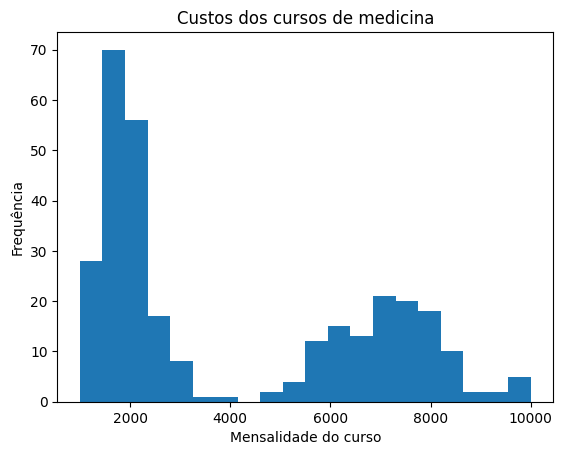

In [ ]:
#Faça um histograma do valor da mensalidade dos cursos de Medicina
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('cursos-prouni.csv')
data['curso_busca'] = data['curso_busca'].str.lower()
data = data[data['curso_busca'].str.contains(r'\bmedicina\b(?<!biomedicina)(?<!veterinária)', case=False)]

custos = data['mensalidade'].values
plt.hist(custos, bins=20)
plt.xlabel('Mensalidade do curso')
plt.ylabel('Frequência')
plt.title('Custos dos cursos de medicina')
plt.show()
